# Curve e superfici B-Spline
## Università degli studi di Firenze
### Autore: Lorenzo Pratesi Mariti

- [Base delle B-spline](#Base-delle-B-spline)
- [Le Curve B-spline](#Le-Curve-B-spline)
  - [Proprietà](#Proprietà)
  - [Rappresentazione di curve B-Spline chiuse](#Rappresentazione-di-curve-B-Spline-chiuse)
- [Le superfici B-Spline](#Le-superfici-B-Spline)
    - [Superfici tensor-product](#Superfici-tensor-product)
    - [Proprietà di invarianza per trasformazioni affini](#Proprietà-di-invarianza-per-trasformazioni-affini)
    - [Algoritmo di de Boor per superfici](#Algoritmo-di-de-Boor-per-superfici)
- [Approssimazione ai minimi quadrati](#Approssimazione-ai-minimi-quadrati)
    - [a](#i)

In [40]:
%plot inline -w 900 -h 600

Base delle B-spline
===================

Definiamo il vettore esteso dei nodi
$$T=\{t_0,...,t_{k-2},t_{k-1},..., t_{n+1},...,t_{k-2}\}$$ 

dove la parte definita da $t_{k-1},..., t_{n+1}$ corrisponde con i nodi di $\tau$, i $k-1$ nodi $t_0,...,t_{k-2}$ e $t_{n+1},...,t_{k-2}$ vengono chiamati *nodi ausiliari* e sono tanti quanto è il grado. Si ha in oltre che $\tau_0=t_{k-1}$, $T_{L-1} = t_{n+1}$. Si suppone che valga $t_0 \leq ... \leq t_{n+k}$. Con $k$ generico, si ottiene per differenza di indici che $L+1 = n+1-k+2$ e $n=k+L-2$. La sua dimensione è $k+(L-1)$ che espressa in termini di $n$ si ottiene $\dim(S_{m,r})=n+1$, in questa
notazione $[a,b]=[t_{k-1},t_{n+1}]$. I punti ausiliari sono usati come strumento per la definizione. La definizione delle B-Spline è ricorsiva. Definiamo quello di ordine $k=1$, con continuità $C^0$, 

$$N_{i, 1}(t) = \begin{cases} 1, & \text{se } t_i\leq t \leq t_{i+1} \\ 0, & \text{altrimenti} \end{cases}$$ 

dove il primo pedice della $N$ indica l’indice della spline, e il secondo il $k$. Si ha quindi,

$$N_{i, k}(t) = \omega_{i,k}(t)N_{i, k-1}(t) + [1-\omega_{i+1, k}(t)]N_{i+1, k-1}$$

con $$\omega_{i,k}(t) = \begin{cases} \frac{t-t_i}{t_{i+k-1}-t_i}, & \text{se } t<t_{i+k-1} \\ 0, & \text{altrimenti} \end{cases}$$ 
Nel seguente codice Matlab sono state implementate le
funzioni descritte sopra per il calcolo delle basi di *Cox - De Boor*.\
La funzione principale è `CoxDeBoor`, la quale si occupa di calcolare
le basi delle B-Spline richiamando la funzione `omega` per il calcolo
dei coefficienti $\omega_{i,r}$ nella relazione ricorrente di *Cox - De
Boor*.\
A livello implementativo, nella funzione `CoxDeBoor` la parte più
delicata è il controllo da effettuare nel caso in cui l’ordine della
B-Spline sia $1$. In quel caso la funzione restituisce $1$ se il valore
di $t\_star$ cade nell’intervallo $[t_i, t_{i+1}) $ ma nel caso in cui
si trovasse nell’ultimo intervallo, bisogna prendere in considerazione
anche l’ultimo valore dell’intervallo.\
Per quanto riguarda invece la funzione `omega`, è stato previsto un
controllo per fare in modo che restituisca zero nel caso di denominatore
nullo, che si può verificare in caso di nodi con molteplicità maggiore
di uno.


In [2]:
function [y, x] = bspline_basis(i, k, t, x)
% B-spline basis function value N(i, k) at x.
%
% Input arguments:
% i:
%    interval index, 0 =< i < numel(t)-k
% k:
%    B-spline order (2 for linear, 3 for quadratic, etc.)
% t:
%    knot vector
% x (optional):
%    value where the basis function is to be evaluated
%
% Output arguments:
% y:
%    B-spline basis function value, nonzero for a knot span of n

if nargin < 4
    x = linspace(t(1), t(end), 1000);  % allocate points uniformly

y = bspline_basis_recurrence(i,k,t,x);

function y = bspline_basis_recurrence(i,r,t,t_star)

y = zeros(size(t_star));
if r > 1
    N_ir = bspline_basis(i,r-1,t,t_star);
    
    omega1 = calc_omega(i+1, r, t, t_star);
    y = y + N_ir.*omega1;
       
    N_ir = bspline_basis(i+1,r-1,t,t_star);
    omega2 = 1 - calc_omega(i+1+1, r, t, t_star);

    y = y + N_ir.*omega2;
    
elseif t(i+2) < t(end)  % treat last element of knot vector as a special case
    y(t(i+1) <= t_star & t_star < t(i+2)) = 1;
else
    y(t(i+1) <= t_star) = 1;
end

end

function [omega] = calc_omega (i, r, t, t_star)
    omega = 0;    
    omega_num = t_star - t(i);
    omega_den = t(i+r-1) - t(i);
    
    if omega_den ~= 0  % indeterminate forms 0/0 are deemed to be zero
        omega = omega_num./omega_den;
    end
end




Error: Function definition not supported in this context. Create functions in code file.



Per disegnare degli esempi di basi B-Spline viene utilizzato lo sript sottostante in cui si richiama la funzione `bspline_basis` per il calcolo delle basi di *Cox - de Boor*. Vediamo degli esempi.

##### Base di Bernstein di ordine 6
Rappresenta un caso particolare di B-Spline in cui, il vettore esteso dei nodi è formato solamente da $\tau_0 = 0$ ripetuto ordine volte, seguito da $\tau_L = 1$ ripetuto ordine volte.

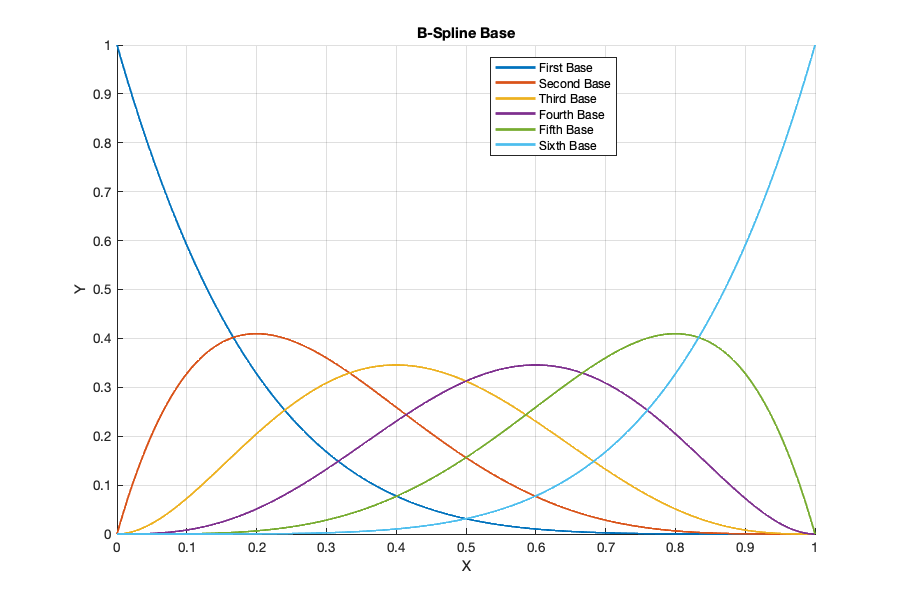

In [3]:
% Illustrates B-spline basis functions.
t = [0 0 0 0 0 0 1 1 1 1 1 1];  % knot vector
k = 6; % degree of the spline basis

title('B-Spline Base');
xlabel('X');ylabel('Y');
hold all; grid on;

% Calculate and plot curves for the elements of the base using 
% Cox-de Boor recursion formula.
for j = 0 : numel(t) - k - 1
    [y, x] = bspline_basis(j, k, t);
    
    ordinal = iptnum2ordinal(j+1);
    plot(x, y, 'linewidth', 2, 'DisplayName', [upper(ordinal(1)), ordinal(2:min(end)) ' Base']);
end

legend('Location', 'best');

######  B-Spline di ordine 4
Veiamo un esempio di base B-SPline di ordine 4 (`k = 4`) con vettore esteso di nodi definito come `t = [0, 0, 0, 1, 1.2, 3, 4.5, 5, 5]`.

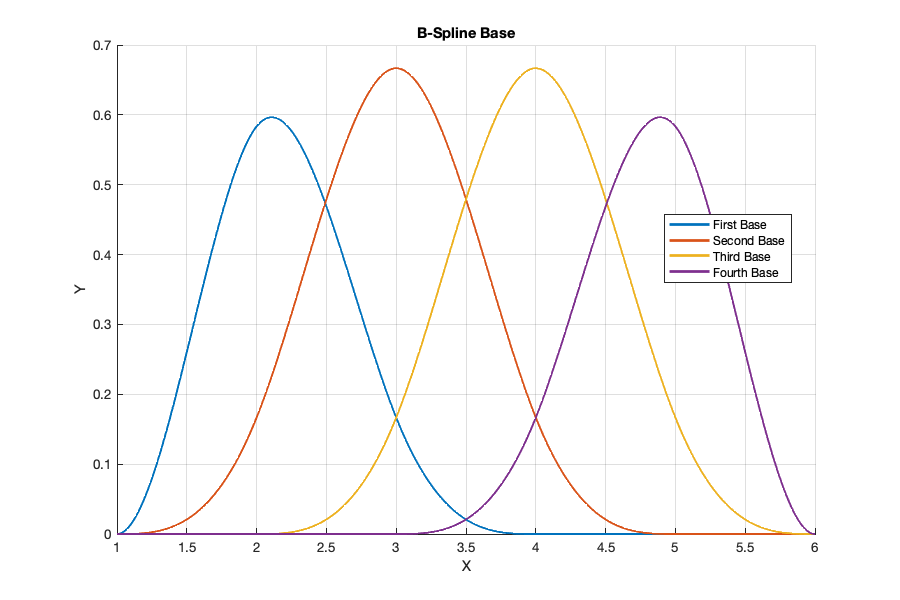

In [130]:
% Illustrates B-spline basis functions.
t = [1, 1, 2, 3, 4, 5, 6, 6];  % knot vector
k = 4; % degree of the spline basis

title('B-Spline Base');
xlabel('X');ylabel('Y');
hold all; grid on;

% Calculate and plot curves for the elements of the base using 
% Cox-de Boor recursion formula.
for j = 0 : numel(t) - k - 1
    [y, x] = bspline_basis(j, k, t);
    
    ordinal = iptnum2ordinal(j+1);
    plot(x, y, 'linewidth', 2, 'DisplayName', [upper(ordinal(1)), ordinal(2:min(end)) ' Base']);
end

legend('Location', 'best');

Le Curve B-spline
==============

Vediamo ora come si definiscono le curve parametriche di tipo spline con questa base. Supponiamo che sia dato l'intervallo $[a,b]$. Sia quindi $\tau=\{\tau_o,...,\tau_L\}$ una partizione coincidente con l'intervallo. Prendiamo ora 

$$T=\{t_0,...,t_{k-2},t_{k-1},...,t_{n+1},...,t_{n+k}\}$$

si Ha $N_{ik}(t), \forall i = 0,...,n$, $n=k+\mu-1$. E' una base per lo spazio $S_{m,M,\tau}$. Una generica funzione dello spazio è quindi combinaziome lineare di $N_{ik}$. Quindi una spline generalizzata deve essere 

$$S(t) = \sum_{i=0}^{n} \alpha_i N_{i, k}(t), \text{ } t\in[t_{k-1},t_{n+1}]$$

Una curva parametrica di tipo spline generalizzata si scrive in forma vettoriale come 
$$\mathbf{X}(t) := \sum_{i=0}^{n} \mathbf{d}_i N_{i, k}(t), \text{ } t\in[t_{k-1},t_{n+1}]$$
con i $\mathbf{d}_i$ punti di controllo in $\mathbb{E}^{2,3}$, detti di *de Boor*.

## Algoritmo di de Boor
L’algoritmo di de Boor permette di calcolare le coordinate di un punto appartenente ad una curva B-spline senza conoscere esplicitamente le funzioni B-spline di base. Esso può essere visto come la generalizzazione dell’algoritmo di de Casteljau e, come tale, fa uso della interpolazione lineare ripetuta. Tale algoritmo si basa sul fatto che aumentando la molteplicità di un knot interno, decresce il numero di funzioni base non nulle che attraversano questo knot, infatti, se la molteplicità di questo knot è $m$, ci sono al più $degree − m + 1$ funzioni base non nulle che attraversano questo knot. Questo implica che in un nodo di molteplicità pari al grado della curva, ci sarà solo un funzione base (essendo $degree − degree + 1 = 1$ ) non nulla il cui valore in corrispondenza di tale knot sarà uguale ad $1$ per il principio della partizione dell’unità. Quindi, nell’algoritmo di *de Boor*, un nodo $t$ viene inserito ripetutamente in modo che la sua molteplicità sia pari al grado della curva. L’ultimo nuovo punto di controllo generato sarà quindi il punto della curva che corrisponde ad $t$.

La descrizione dell’algoritmo è illustrata nel seguente pseudo codice. 

```
Input: a value u
Output: the point on the curve, p(u)

If u lies in [uk,uk+1) and u != uk, let h = p (i.e., inserting u p times) and s = 0;
If u = uk and uk is a knot of multiplicity s, let h = p - s (i.e., inserting u p - s time);
Copy the affected control points pk-s, pk-s-1, pk-s-2, ..., pk-p+1 and pk-p to 
a new array and rename them as pk-s,0, pk-s-1,0, pk-s-2,0, ..., pk-p+1,0;

for r := 1 to h do
    for i := k-p+r to k-s do
        begin
            Let ai,r = (u - ui) / ( ui+p-r+1 - ui )
            Let pi,r = (1 - ai,r) pi-1,r-1 + ai,r pi,r-1
        end
        
pk-s,p-s is the point p(u).
```

In [7]:
function [C, U] = bspline_deboor(n, t, P, U)
% Evaluate explicit B-spline at specified locations.
%
% Input arguments:
% n:
%    B-spline order (2 for linear, 3 for quadratic, etc.)
% t:
%    knot vector
% P:
%    control points, typically 2-by-m, 3-by-m or 4-by-m (for weights)
% u (optional):
%    values where the B-spline is to be evaluated, or a positive
%    integer to set the number of points to automatically allocate
%
% Output arguments:
% C:
%    points of the B-spline curve

d = n;  % B-spline polynomial degree (1 for linear, 2 for quadratic, etc.)
nctrl = numel(t) - (d + 1);

if nargin < 4
    U = linspace(t(d+1), t(end-d), 10*size(P,2));  % allocate points uniformly
elseif isscalar(U) && U > 1
    U = linspace(t(d+1), t(end-d), U);  % allocate points uniformly
else
    assert(all( U >= t(d+1) & U <= t(end-d) ), 'bspline:deboor:InvalidArgumentValue', ...
        'Value outside permitted knot vector value range.');
end

m = size(P, 1);  % dimension of control points
t = t(:).'
U = U(:);
S = sum(bsxfun(@eq, U, t), 2);  % multiplicity of u in t (0 <= s <= d+1)
I = bspline_deboor_interval(U,t);

Pk = zeros(m,d+1,d+1);
a = zeros(d+1,d+1);

C = zeros(size(P,1), numel(U));
for j = 1 : numel(U)
    u = U(j);
    s = S(j);
    ix = I(j);
    Pk(:) = 0;
    a(:) = 0;

    % identify d+1 relevant control points
    Pk(:, (ix-d):(ix-s), 1) = P(:, (ix-d):(ix-s));
    h = d - s;

    if h > 0
        % de Boor recursion formula
        for r = 1 : h
            q = ix-1;
            for i = (q-d+r) : (q-s)
                a(i+1,r+1) = (u-t(i+1)) / (t(i+d-r+1+1)-t(i+1));
                Pk(:,i+1,r+1) = (1-a(i+1,r+1)) * Pk(:,i,r) + a(i+1,r+1) * Pk(:,i+1,r);
            end
        end
        C(:,j) = Pk(:,ix-s,d-s+1);  % extract value from triangular computation scheme
    elseif ix == numel(t)  % last control point is a special case
        C(:,j) = P(:,end);
    else
        C(:,j) = P(:,ix-d);
    end
end

function ix = bspline_deboor_interval(u,t)
% Index of knot in knot sequence not less than the value of u.
% If knot has multiplicity greater than 1, the highest index is returned.

i = bsxfun(@ge, u, t) & bsxfun(@lt, u, [t(2:end) 2*t(end)]);  % indicator of knot interval in which u is
[row,col] = find(i);
[row,ind] = sort(row);  % restore original order of data points
ix = col(ind);

Error: Function definition not supported in this context. Create functions in code file.



## Proprietà
Le principali proprietà delle curve B-Spline sono le seguenti:

### Invarianza per Trasformazioni Affini 
La proprietà di essere una partizione dell’unità garantisce che le curve B-spline siano invarianti per trasformazioni affini, ovvero queste due procedure producono lo stesso risultato:
Dati i vertici di controllo:
- Calcolo la curva e poi le applico la trasformazione affine.
- Applico la trasformazione affine ai vertici di controllo e poi calcolo la curva.

L’importanza pratica di questa proprietà è la seguente. Supponiamo di aver disegnato una curva e di volerle applicare una certa trasformazione affine (rotazio- ne, traslazione, scala, ...). Il modo più semplice di procedere è applicare ai vertici di controllo la trasformazione affine desiderata, poi ridisegnare la curva.

Nello Script sottostante è stata inizialmente definita e disegnata una curva B-Spline e successivamente applicata una trasformazione affine prima ai suoi punti di controllo e successivamente alla curva. In particolare sono state applicate in quest'ordine una rotazione traslazione e scalatura, inizialmente ai vertici di controllo originali, ottenendo la curva di coloro arancione mostrata in Figura 3. Successivamente sono state applicate le stesse trasformazioni direttamente sulla curva originale ottenendo la B-Spline di colore viola mostrata in Figura 3. La proprietà di invarianza per trasformazioni affini viene confermata dal fatto che le due curve combaciano.

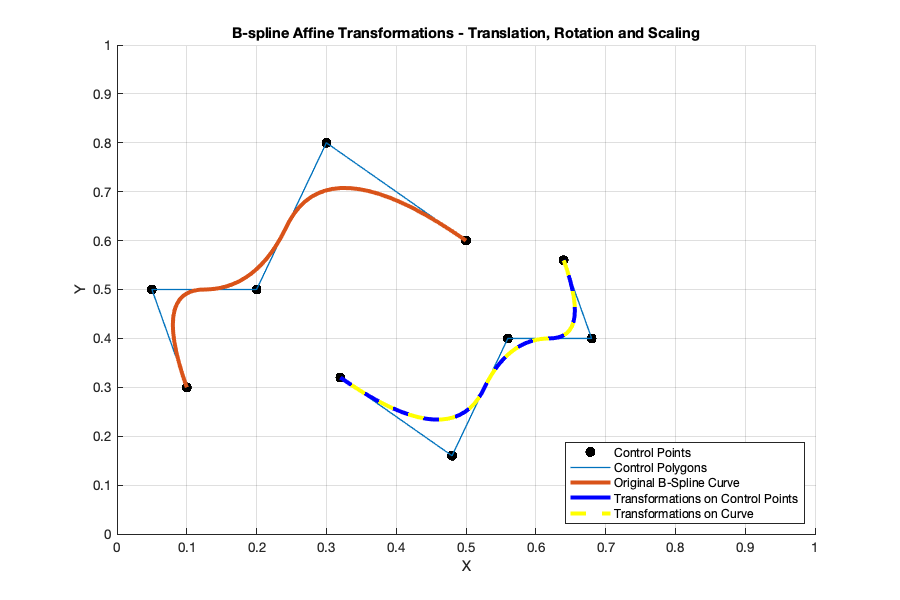

In [121]:
num_curve_points = 1000;
knot_vector = [0 0 0 0.3 0.6 1 1 1];
degree = 3;
control_points = [0.1 0.3; 0.05 0.5; 0.2 .5; 0.3 0.8; 0.5 0.6];

% Set the figure window for drawing plots.
fig = figure('Name', 'B-spline Affine Transformations', 'NumberTitle', 'off');
hold on; grid on;
xlabel('X');
ylabel('Y');
title(['B-spline Affine Transformations - Translation, Rotation and Scaling']);
axes = gca;
axes.XAxisLocation = 'origin';
axes.YAxisLocation = 'origin';
xlim([0 1]);
ylim([0 1]);

% Calculate the parameter (t) steps for drawing the B-Spline curves.
steps = linspace(knot_vector(degree+1), knot_vector(end-degree), num_curve_points);

% Plot control points and control polygon.
poi_plot = plot(control_points(:, 1), control_points(:, 2), 'k.', 'MarkerSize', 20);
pol_plot = plot(control_points(:, 1), control_points(:, 2), '-', 'linewidth', 1, 'color', '#0072BD');

% Calculate and plot the original B-Spline curve using De Boor algorithm.
curve = bspline_deboor(degree, knot_vector, control_points');
original_curve = curve;
original_curve_plot = plot(curve(1, :), curve(2, :), 'linewidth', 3, 'color', '#D95319');

% Tranlation, rotation and scaling transformations.
translation = [.9 1];
rotation = [cos(pi) -sin(pi); sin(pi) cos(pi)];
scaling = [0.8 0; 0 0.8];

% Transformation on control points.
control_points = (control_points*rotation + translation)*scaling;

% Plot transformed control points and control polygon.
plot(control_points(:, 1), control_points(:, 2), 'k.', 'MarkerSize', 20);
plot(control_points(:, 1), control_points(:, 2), '-', 'linewidth', 1, 'color', '#0072BD');

% Calculate and plot the transformed B-Spline curve on control points.
curve = bspline_deboor(degree, knot_vector, control_points');
trasf_control_plot = plot(curve(1, :), curve(2, :), 'linewidth', 3, 'color', 'blue');

% Plot transformation on B-Spline curve points and legend.
original_curve = (original_curve' * rotation + translation) * scaling;
trasf_curve_plot = plot(original_curve(:, 1), original_curve(:, 2), '--', 'linewidth', 3, 'color', 'yellow');

legend([poi_plot pol_plot original_curve_plot ...
        trasf_control_plot trasf_curve_plot], 'Control Points', ...
        'Control Polygons', 'Original B-Spline Curve', ...
        'Transformations on Control Points', 'Transformations on Curve',...
        'Location', 'southeast');

### Località
Muovendo il vertice di controllo $\mathbf{d}_i$ la curva $\mathbf{X}(t)$ cambia solo nell’intervallo $[t_i, t_{i+k})$. Questo segue dal fatto che $N_{i, k}(t) = 0$ per $t \notin [t_i, t_{i+k})$. Equivalentemente, $\mathbf{d}_i$ influenza solo al più $k$ segmenti di curva.

Nello script sottostante viene mostrata come descritta sopra, ovvero data una B-Spline di ordine 4 con $10$ punti di controllo, spostando il quinto punto la curva  varia solamente nell'intervallo $[t_5,t_9)$. La proprietà di località ci dice anche che una curva B-Spline $\mathbf{X}(t^*)$ con $t^* \in [t_r,t_{r+1}]$ è determinata da $k$ punti di controllo $\mathbf{d}_{r-k+1},\dots,\mathbf{d}_r$.

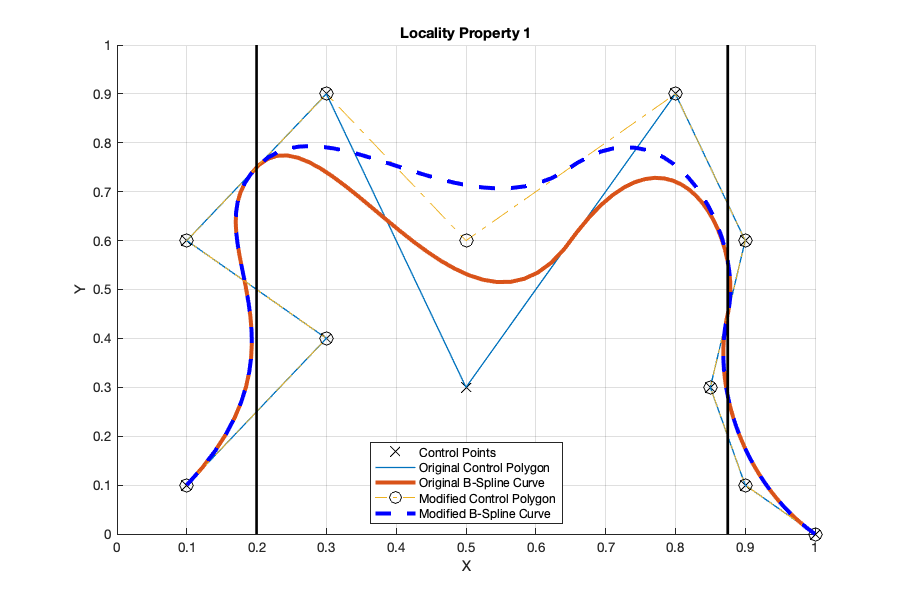

In [106]:
num_curve_points = 1000;
knot_vector = [0 0 0 0 0.25 0.25 0.5 0.5 0.75 0.75 1 1 1 1];
degree = 4;
control_points = [0.1 0.1; 0.3 0.4; 0.1 0.6; 0.3 0.9; 0.5 0.3; 0.8 0.9; 0.9 0.6; 0.85 0.3; 0.9 0.1; 1 0];

% Set the figure window for drawing plots.
fig = figure('Name', 'Locality Property 1', 'NumberTitle', 'off');
hold on;grid on;
xlabel('X'); ylabel('Y'); title('Locality Property 1');
axes = gca;
axes.XAxisLocation = 'origin';
axes.YAxisLocation = 'origin';
xlim([0 1]);
ylim([0 1]);

% Plot control points and control polygon of the original curve.
plot(control_points(:, 1), control_points(:, 2), 'kx', 'MarkerSize', 10);
plot(control_points(:, 1), control_points(:, 2), '-', 'linewidth', 1, ...
     'color', '#0072BD');

% Calculate and plot the original B-Spline curve using De Boor algorithm.
curve = bspline_deboor(degree, knot_vector, control_points');
plot(curve(1, :), curve(2, :), 'linewidth', 3, 'color', '#D95319');

% Control point modification.
control_point_mod = 5;
control_points(control_point_mod, :) = [0.5 0.6];

% Plot control points and control polygon of the modified curve.
plot(control_points(:, 1), control_points(:, 2), '-.o', ...
     'color', '#EDB120', 'MarkerEdgeColor', 'k', 'MarkerSize', 10);

% Calculate and plot the modified B-Spline curve.
curve = bspline_deboor(degree, knot_vector, control_points');
plot(curve(1, :), curve(2, :), '--', 'linewidth', 3, 'color', 'blue');

% Plot lines for highlighting the modified interval.
left_line = bspline_deboor(degree,knot_vector,control_points', knot_vector(control_point_mod));
right_line = bspline_deboor(degree,knot_vector,control_points', knot_vector(control_point_mod+degree+1));
plot([left_line(1) left_line(1)], [0 1], 'k', 'linewidth', 2)
plot([right_line(1) right_line(1)], [0 1], 'k', 'linewidth', 2)


legend({'Control Points', 'Original Control Polygon', ...
        'Original B-Spline Curve', 'Modified Control Polygon', ...
        'Modified B-Spline Curve'}, 'Location', ...
        'south');

Nello script sottostante è mostrato questo comportamento, scegliendo $r=6$ e modificando i punti di controllo $\mathbf{d}_j \notin [\mathbf{d}_3, \mathbf{d}_6]$ la curva $\mathbf{X}(t^*)$ rimane invariata per $t^* \in [t_6,t_7)$.


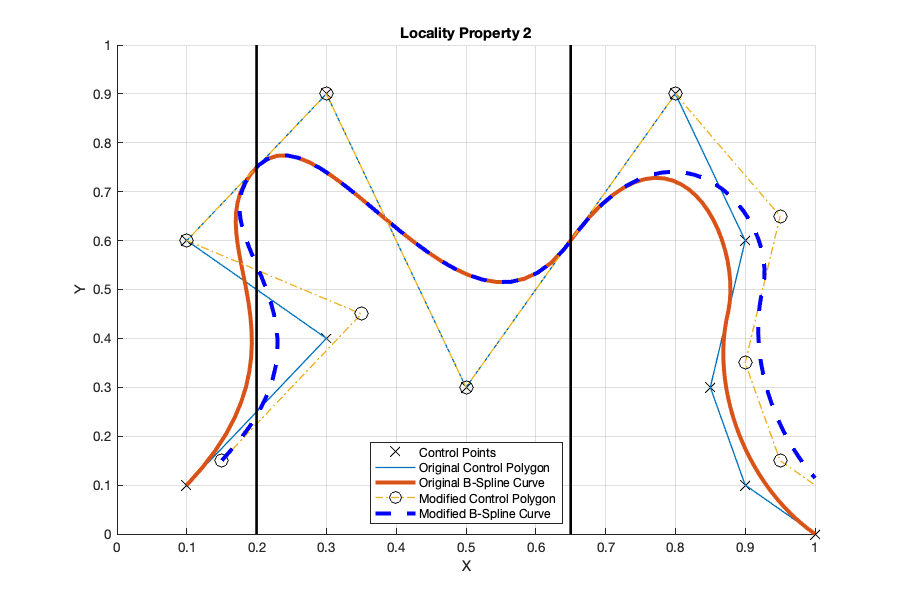

In [112]:
control_points = [0.1 0.1; 0.3 0.4; 0.1 0.6; 0.3 0.9; 0.5 0.3; 0.8 0.9; 0.9 0.6; 0.85 0.3; 0.9 0.1; 1 0];
degree = 4;
% Set the figure window for drawing plots.
fig = figure('Name', 'Locality Property 2', 'NumberTitle', 'off');

hold on; grid on;
xlabel('X');
ylabel('Y');
title('Locality Property 2');
axes = gca;
axes.XAxisLocation = 'origin';
axes.YAxisLocation = 'origin';
xlim([0 1]);
ylim([0 1]);

% Plot control points and control polygon of the original curve.
plot(control_points(:, 1), control_points(:, 2), 'kx', 'MarkerSize', 10);
plot(control_points(:, 1), control_points(:, 2), '-', 'linewidth', 1, ...
     'color', '#0072BD');

% Calculate and plot the original B-Spline curve using De Boor algorithm.
curve = bspline_deboor(degree, knot_vector, control_points');
plot(curve(1, :), curve(2, :), 'linewidth', 3, 'color', '#D95319');

% Choose the interval not to be change and modify the other control points.
r = 6;
control_points(1:r-degree, :) = control_points(1:r-degree, :) + 0.05;
control_points(r+1:end, :) = control_points(r+1:end, :) + 0.05;

% Plot control points and control polygon of the modified curve.
plot(control_points(:, 1), control_points(:, 2), '-.o', 'linewidth', 1, ...
     'color', '#EDB120', 'MarkerEdgeColor', 'k', 'MarkerSize', 10);

% Calculate and plot the modified B-Spline curve.
curve = bspline_deboor(degree, knot_vector, control_points');
plot(curve(1, :), curve(2, :), '--', 'linewidth', 3, 'color', 'blue');

% Plot lines for highlighting the untouched interval.
left_line = bspline_deboor(degree, knot_vector, control_points', ...
                              knot_vector(r));
right_line= bspline_deboor(degree, knot_vector, control_points', ...
                              knot_vector(r+1));
plot([left_line(1) left_line(1)], [0 1], 'k', ...
     'linewidth', 2)
plot([right_line(1) right_line(1)], [0 1], 'k', ...
      'linewidth', 2)

legend({'Control Points', 'Original Control Polygon', ...
        'Original B-Spline Curve', 'Modified Control Polygon', ...
        'Modified B-Spline Curve'}, 'Location', ...
        'south');

### Strong Convex Hull
La curva è contenuta nel guscio convesso del suo poligono di controllo.

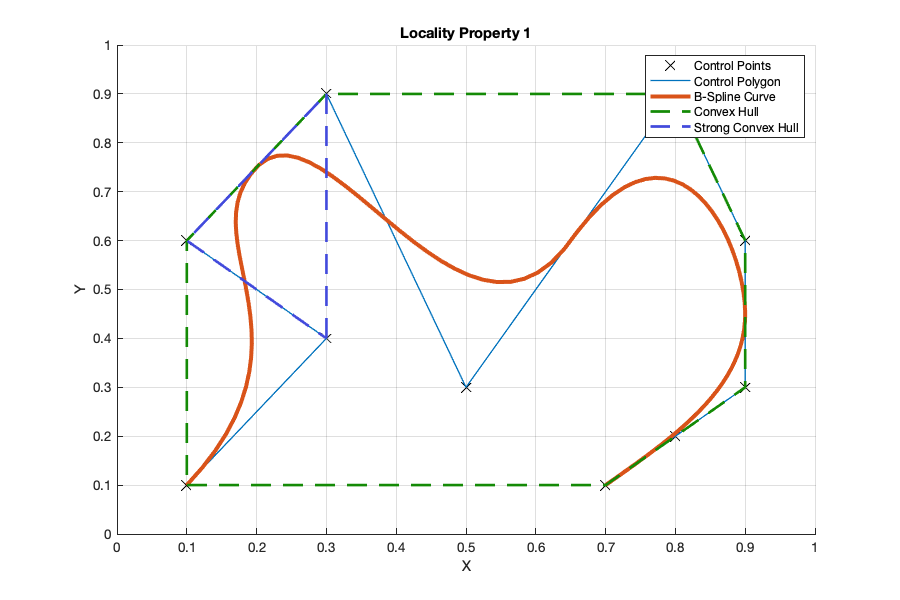

In [113]:
control_points = [0.1 0.1; 0.3 0.4; 0.1 0.6; 0.3 0.9; 0.5 0.3; 0.8 0.9; 0.9 0.6; 0.9 0.3; 0.8 0.2; 0.7 0.1];
degree = 4;
% Set the figure window for drawing plots.
fig = figure('Name', 'Strong Convex Hull Property', 'NumberTitle', 'off');
hold on;grid on;
xlabel('X'); ylabel('Y'); title('Locality Property 1');
axes = gca;
axes.XAxisLocation = 'origin';
axes.YAxisLocation = 'origin';
xlim([0 1]);
ylim([0 1]);

% Plot control points and control polygon of the original curve.
plot(control_points(:, 1), control_points(:, 2), 'kx', 'MarkerSize', 10);
plot(control_points(:, 1), control_points(:, 2), '-', 'linewidth', 1, ...
     'color', '#0072BD');

% Calculate and plot the original B-Spline curve using De Boor algorithm.
curve = bspline_deboor(degree, knot_vector, control_points');
plot(curve(1, :), curve(2, :), 'linewidth', 3, 'color', '#D95319');

[k,av] = convhull(control_points);
plot(control_points(k,1),control_points(k,2), '--', 'linewidth', 2, 'color', '#148A06')

[k,av] = convhull(control_points(end-5+1:end-2,:));
plot(control_points(k+1,1),control_points(k+1,2), '--', 'linewidth', 2, 'color', '#424ADC')

legend({'Control Points', 'Control Polygon', 'B-Spline Curve', 'Convex Hull', 'Strong Convex Hull'});

### Variation Diminishing
Il numero di intersezioni tra la curva e una retta qualunque è minore o uguale al numero di intersezioni tra il poligono di controllo della curva e tale retta. Ne segue che:
- Se il poligono di controllo è convesso, la curva è convessa.
- Il numero di cambi di concavità della curva è minore o uguale al numero di cambi di concavità del poligono di controllo.

Nello script sottostante è mostrata questa proprietà. Fissata una curva B-Spline, sono stati generati due punti randomici per i quali far passare una retta. Qualsiasi retta generata dallo script avrà un numero di intersezioni con la curva minore o uguale al numero di intersezioni con il poligono di controllo.

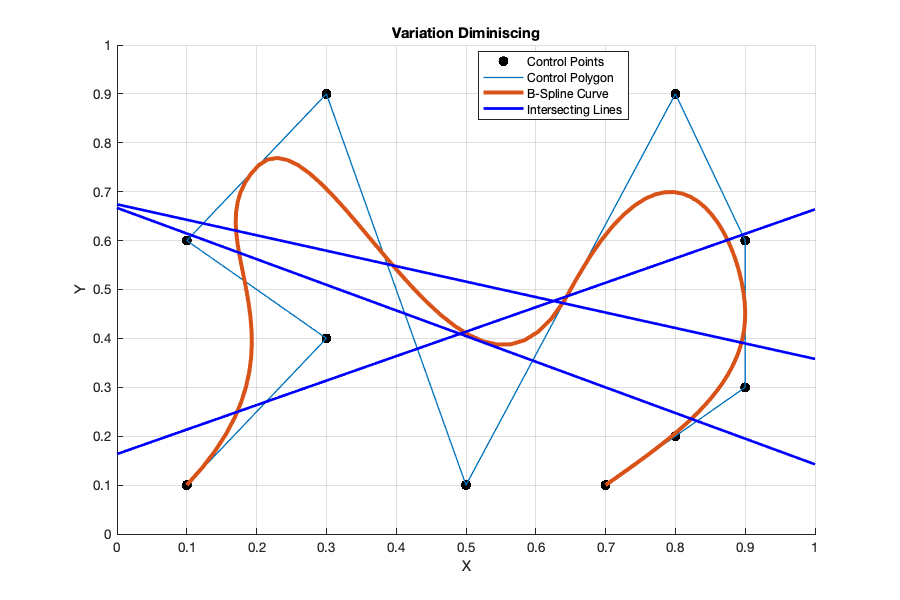

In [114]:
num_curve_points = 1000;
knot_vector = [0 0 0 0 0.25 0.25 0.5 0.5 0.75 0.75 1 1 1 1];
degree = 4;
control_points = [0.1 0.1; 0.3 0.4; 0.1 0.6; 0.3 0.9; 0.5 0.1; 0.8 0.9; 0.9 0.6; 0.9 0.3; 0.8 0.2; 0.7 0.1];

% Set the figure window for drawing plots.
fig = figure('Name', 'Variation Diminiscing', 'NumberTitle', 'off');
fig.Position(3:4) = [800 600];
movegui(fig, 'center');
hold on;
grid on;
xlabel('X');
ylabel('Y');
title('Variation Diminiscing');
axes = gca;
axes.XAxisLocation = 'origin';
axes.YAxisLocation = 'origin';
xlim([0 1]);
ylim([0 1]);

% Plot control points and control polygon of the original curve.
plot(control_points(:, 1), control_points(:, 2), 'k.', 'MarkerSize', 20);
plot(control_points(:, 1), control_points(:, 2), '-', 'linewidth', 1, ...
     'color', '#0072BD');

% Calculate and plot the original B-Spline curve using de Boor algorithm.
curve = bspline_deboor(degree, knot_vector, control_points');
plot(curve(1, :), curve(2, :), 'linewidth', 3, 'color', '#D95319');

% Generate 3 random line to intersect with the curve.
for i=1:3
    y = 0.1 + (0.8-0.1).*rand(1, 2);
    plot([0 1], y, 'k', 'linewidth', 2, 'color', 'b');
end

legend({'Control Points', 'Control Polygon', 'B-Spline Curve', 'Intersecting Lines'}, 'Location', 'best');

## Rappresentazione di curve B-Spline chiuse
Siano $\mathbf{d}_1,\dots \mathbf{d}_m$ i vertici di controllo del poligono chiuso (con $\mathbf{d}_1 = \mathbf{d}_m$). 
Per definire una curva B-Spline chiusa di ordine $k$, si sceglie la partizione nodale 

$$\mathbf{t} = \left[ \frac{-k}{m-1} : \frac{1}{m-1} : \frac{k+m-1}{m-1} \right]$$

e si estende il poligono di controllo  aggiungendo i vertici $$\mathbf{d}_{m+1} = \mathbf{d}_2,\mathbf{d}_{m+2} = \mathbf{d}_3, \dots, \mathbf{d}_{m+k-1} = \mathbf{d}_k, \mathbf{d}_{m+k} = \mathbf{d}_{k+1} $$

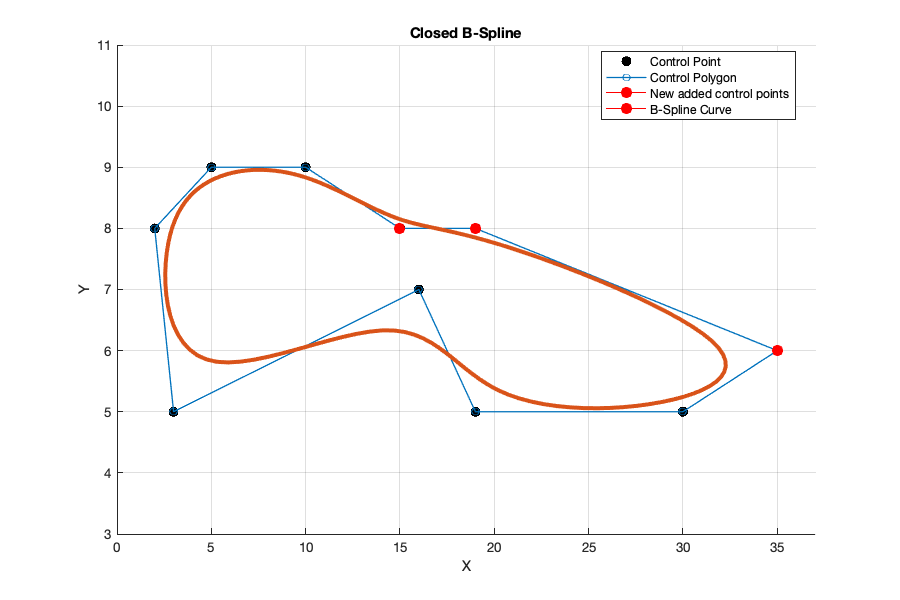

In [115]:
%plot inline -w 900 -h 600
% Get the order of the B-Spline curve.

% Set the figure window for drawing plots.
k = 4;
px = [35 19 15 10 5 2 3 16 19 30 35 19 15];
py = [ 6  8  8  9 9 8 5  7  5  5  6  8  8];
m = (length(px)-k)-1;
knots = -k/m : 1/m : (k+m)/m;

hold on; grid on;
xlabel('X');
ylabel('Y');
title('Closed B-Spline');
xlim([min(px)-2 max(px)+2]);
ylim([min(py)-2 max(py)+2]);

plot(px, py, 'k.', 'MarkerSize', 20);
plot(px, py, 'o-', 'linewidth', 1, 'color', '#0072BD');

curve = bspline_deboor(k, knots, [px; py]);

for i = 1:k-1
    plot(px(i), py(i), 'ro-', 'markersize', 8, 'MarkerFaceColor','r');
end

plot(curve(1, :), curve(2, :), 'linewidth', 3, 'color', '#D95319');

legend({'Control Point', 'Control Polygon','New added control points', 'B-Spline Curve'}, 'Location', 'best');

Le superfici B-Spline
==============

Una superficie può essere rappresentata mediante equazione implicita:
$$f(x,y,z) = 0$$
o parametrica:
$$\mathbf{X}(u, v) = \begin{pmatrix}
x(u, v) \\
y(u, v) \\
z(u, v)
\end{pmatrix}$$
con $u, v \in [a, b] \subset \mathbb{R}^2$. La seguente superfice parametrica

$$\mathbf{X}(u, v) = \begin{pmatrix}
(2+\cos(v))\cdot\cos(u)\\
(2+\cos(v))\cdot\sin(u) \\
\sin(v)
\end{pmatrix}$$
è stata implementata nel codice sottostante.

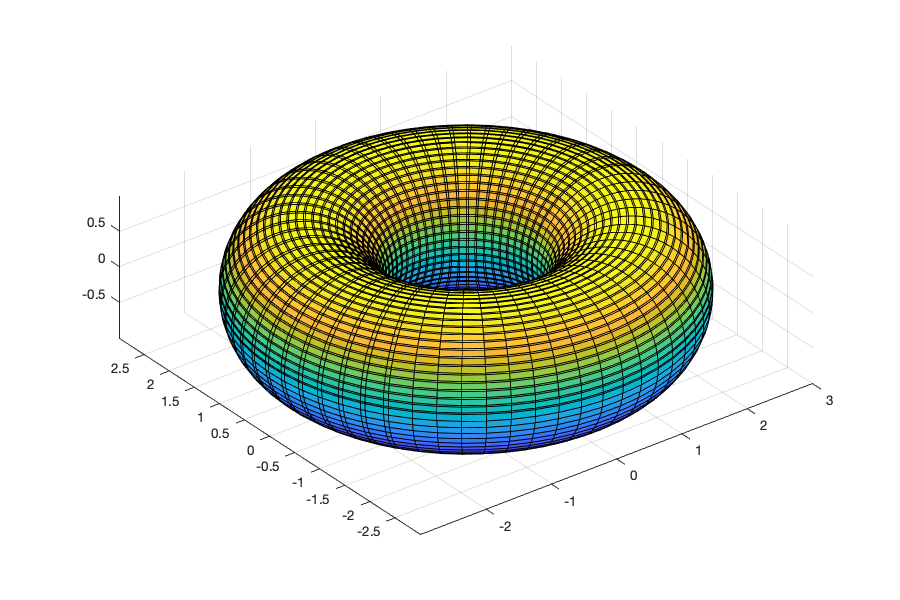

In [19]:
u = linspace(0 , 10 , 100);
v = linspace(0 , 10 , 100);
[uu , vv] = meshgrid (u, v);
x = (2 + cos(vv)) .* cos(uu);
y = (2 + cos(vv)) .* sin(uu);
z = sin(vv);
surf(x, y,z); axis equal;

## Superfici tensor-product

Sia $\{B^{A}_{0}(u), \dots, B^{A}_{n}(u) \}$ un set di $n + 1$ funzioni monovariate linearmente indipendenti e definite su un intervallo $ I_A = [a_A, b_A]$ della retta reale, analogamente, sia $\{ B^{B}_{0}(v), \dots, B^{B}_{m}(v) \}$ un altro set di $m + 1$ funzioni monovariate linearmente indipendenti e definite su un intervallo $ I_B = [a_B, b_B]$. Definiamo allora i corrispondenti due spazi di funzioni monovariate,

$$S_A = < B^{A}_{0}(u), \dots, B^{A}_{n}(u) >\ , \qquad S_B = < B^{B}_{0}(v), \dots, B^{B}_{m}(v) >$$

Posto $A := I_A \times I_B$, possiamo allora definire il corrispondente spazio tensor–product, $S_A \otimes S_B$ come lo spazio costituito da funzioni bivariate definite sul rettangolo $A$ che sono combinazioni lineari delle
funzioni prodotto $B_i^A(u)B_j^B(v)$, $i = 0, . . . , n$, $j = 0, . . . , m,$

$$S_A \otimes S_B = \left\{ f : A \rightarrow \mathbb{R}\ |\  f(u, v) = \sum_{i = 0}^{n}\sum_{j = 0}^{m} c_{i,j}B^A_i(u)B^B_j(v),\  c_{i,j}\in \mathbb{R} \right\}$$


La superficie parametrica tensor-product (patch tensor-product) è definita come
$$\mathbf{X}(u, v) = \sum_{i = 0}^{n} \sum_{j = 0}^{m} \mathbf{b}_{i, j} B^{A}_{i}(u)B_{j}^{B}(v) $$
a partire da un reticolo di $(n + 1)(m + 1)$ punti di controllo.

Siano $U = \{u_0, \dots, u_{n+k}  \}, V = \{ v_0, \dots, v_{m+l}   \}$ due vettori estesi di nodi associati agli intervalli $[a,b] = \{u_{k-1}, \dots, u_{n+1}   \}, [c,d] = \{ v_{l-1}, v_{m+1}\}$, la superficie tensor-product B-Spline $$\mathbf{X}(u, v) = \sum_{i = 0}^{n} \sum_{j = 0}^{m} \mathbf{d}_{i, j} N_{i,k}(u)N_{j,l}(v) $$
con $(u,v) \in [a,b] \times [c,d]$ è definita a partire da $(n+1)(m+1) $ punti di controllo di de Boor $\mathbf{d}_{i,j}, i=0,\dots, n, j=0, \dots, m$.

Nello script sottostante è viene implementato il calcolo e rappresentazione di basi B-Spline di superfici dati in input i gradi delle due basi e i due vettori di nodi utilizzando la definizione di superficie tensor-product vista sopra e calcolando gli elementi delle basi mediante *Cox-de Boor* come visto precedentemente per le curve.

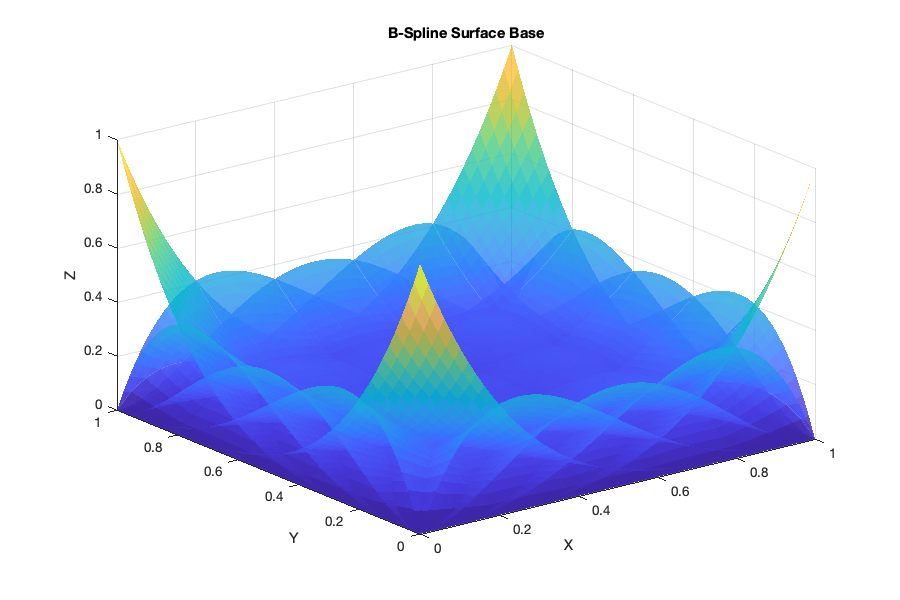

In [125]:
% Retrive inputs.
order_1 = 5;
order_2 = 5;
knot_vector_1 = [zeros(1, order_1), ones(1, order_1)];
knot_vector_2 = [zeros(1, order_2), ones(1, order_2)];
num_steps = 50;

% Initialization of the two basis matrices and steps to plot the surface.
steps_1 = linspace(knot_vector_1(order_1), knot_vector_1(end-order_1+1), num_steps);
steps_2 = linspace(knot_vector_2(order_2), knot_vector_2(end-order_2+1), num_steps);
num_base1_elements = length(knot_vector_1) - order_1;
num_base2_elements = length(knot_vector_2) - order_2; 
first_base = zeros(num_steps, num_base1_elements);
second_base = zeros(num_steps, num_base2_elements);

% Calcualte the first B-Spline base.
for i = 1 : num_steps
    for j = 1 : num_base1_elements
        first_base(i, j) = bspline_basis(j-1, order_1, knot_vector_1, steps_1(i));
    end
end

% Calcualte the second B-Spline base.
for i = 1 : num_steps
    for j = 1 : num_base2_elements
        second_base(i, j) = bspline_basis(j-1, order_2, knot_vector_2, steps_1(i));
    end
end


% Set the figure window for drawing plots.
fig = figure('Name', 'B-Spline Surface Base', 'NumberTitle', 'off');
fig.Position(3:4) = [800 600];
movegui(fig, 'center');

% Plot the B-Spline surface.
for i = 1 : num_base1_elements
    for j = 1 : num_base2_elements
        Z = first_base(:, i) * transpose(second_base(:, j));
        surf(steps_1 , steps_2 , Z, 'FaceAlpha', 0.8); shading flat; s.EdgeColor = 'none';
        hold on;
    end
end
grid on;
xlabel('X');
ylabel('Y');
zlabel('Z');
title('B-Spline Surface Base');


Nello script sottostante è stata rappresentata una curva B-Spline utilizzando la definizione di superficie tensor-product vista in precedenza. Sono state inoltre rappresentate le curve di bordo della superficie. I bordi di una superficie B-Spline sono definiti come:

$$\mathbf{X}(a,v) = \sum_{j=0}^{m} \mathbf{d}_{0,j}N_{j, l}(v) \quad \mathbf{X}(b,v) = \sum_{j=0}^{m} \mathbf{d}_{n,j}N_{j,l}(v)$$

$$\mathbf{X}(u, c) = \sum_{i=0}^{n} \mathbf{d}_{i,0}N_{i,k}(u) \quad \mathbf{X}(u,d) = \sum_{i=0}^{n} \mathbf{d}_{i, m}N_{i,k}(u)$$


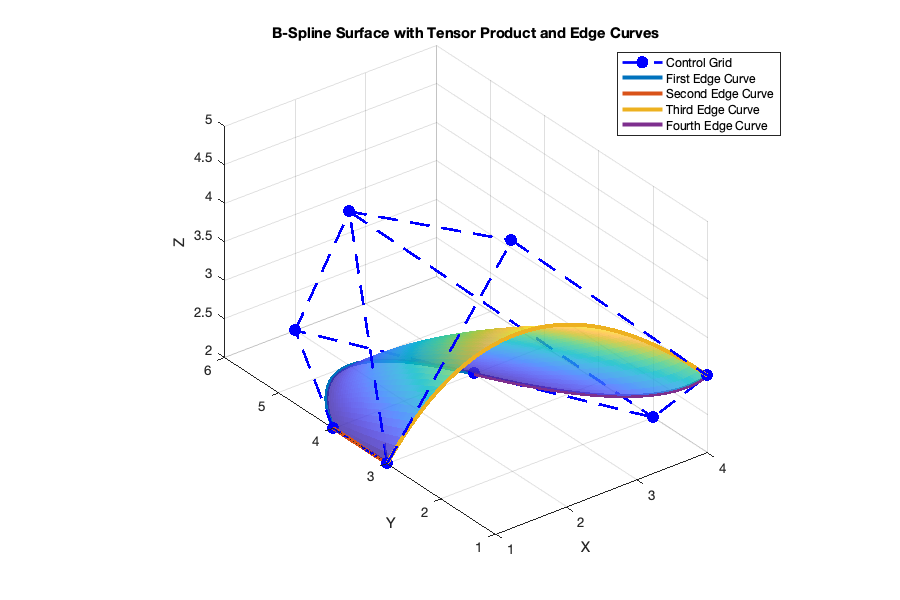

In [27]:
control_grid_x = [1 2 3; 1 2 4; 1 2 4];
control_grid_y = [4 6 4; 3 5 2; 3 2 1];
control_grid_z = [2 2 2; 2 4 2; 2 5 3];
order_1 = 3;
order_2 = 3;
knot_vector_1 = [zeros(1, order_1), ones(1, order_1)];
knot_vector_2 = [zeros(1, order_2), ones(1, order_2)];
num_steps = 50;

% Initialization of the two basis matrices and steps to plot the surface.
steps_1 = linspace(knot_vector_1(order_1), knot_vector_1(end-order_1+1), num_steps);
steps_2 = linspace(knot_vector_2(order_2), knot_vector_2(end-order_2+1), num_steps);
num_base1_elements = length(knot_vector_1) - order_1;
num_base2_elements = length(knot_vector_2) - order_2; 
first_base = zeros(num_steps, num_base1_elements);
second_base = zeros(num_steps, num_base2_elements);

% Calcualte the first B-Spline base.
for i = 1 : num_steps
    for j = 1 : num_base1_elements
        first_base(i, j) = bspline_basis(j-1, order_1, knot_vector_1, steps_1(i));
    end
end

% Calcualte the second B-Spline base.
for i = 1 : num_steps
    for j = 1 : num_base2_elements
        second_base(i, j) = bspline_basis(j-1, order_2, knot_vector_2, steps_1(i));
    end
end

% Set the figure window for drawing plots.
fig = figure('Name', 'B-Spline Surface with Tensor Product', 'NumberTitle', 'off');
fig.Position(3:4) = [800 600];
movegui(fig, 'center');

% Calculate tensor product and plot the B-Spline surface.
second_base_t = transpose(second_base);
surf_x = first_base * control_grid_x * second_base_t;
surf_y = first_base * control_grid_y * second_base_t;
surf_z = first_base * control_grid_z * second_base_t;
surf(surf_x , surf_y , surf_z, 'FaceAlpha', 0.8); shading flat; s.EdgeColor = 'none';
hold on; grid on;
xlabel('X');
ylabel('Y');
zlabel('Z');
title('B-Spline Surface with Tensor Product and Edge Curves');
axes = gca;

% Plot the control grid of the B-Spline surface.
pol_plot = plot3(control_grid_x, control_grid_y, control_grid_z, 'b.--', 'linewidth', 2, 'MarkerSize', 25); 
plot3(control_grid_x', control_grid_y', control_grid_z', 'b--', 'linewidth', 2);

% Plot edge curves and legend.
set(axes, 'ColorOrder', circshift(get(gca, 'ColorOrder'), -1))
edge_curve1_plot = plot3(surf_x(1, :), surf_y(1, :), surf_z(1, :),  'linewidth', 3);
edge_curve2_plot = plot3(surf_x(:, 1), surf_y(:, 1), surf_z(:, 1),  'linewidth', 3);
edge_curve3_plot = plot3(surf_x(end, :), surf_y(end, :),  surf_z(end, :), 'linewidth', 3);
edge_curve4_plot = plot3(surf_x(:, end), surf_y(:, end),  surf_z(:, end), 'linewidth', 3);
axis tight;
axis equal;
legend([pol_plot(1) edge_curve1_plot edge_curve2_plot edge_curve3_plot ...
        edge_curve4_plot], {'Control Grid', 'First Edge Curve', ...
        'Second Edge Curve', 'Third Edge Curve', 'Fourth Edge Curve'}, ...
        'Location', 'best');


## Proprietà di invarianza per trasformazioni affini

Anche le superfici B-Spline godono della proprietà di invarianza per trasformazioni affini vista in precedenza per le curve. L’importanza pratica di questa proprietà è la seguente: supponiamo di aver disegnato una superficie e di volerle applicare una certa trasformazione affine (rotazione, traslazione, scala, ...). Il modo più semplice di procedere è applicare ai vertici di controllo la trasformazione affine desiderata e poi ridisegnare la curva.
Nello script sottostante è stata inizialmente definita e disegnata una superficie B-Spline e successivamente applicata una trasformazione affine. In particolare, sono state applicate in quest'ordine, una rotazione, traslazione e scalatura inizialmente ai vertici di controllo e successivamente direttamente sulla curva originale, ottenendo la stessa B-spline.

La proprietà di invarianza per trasformazioni affini viene confermata dal fatto che le due superfici trasformate combaciano.


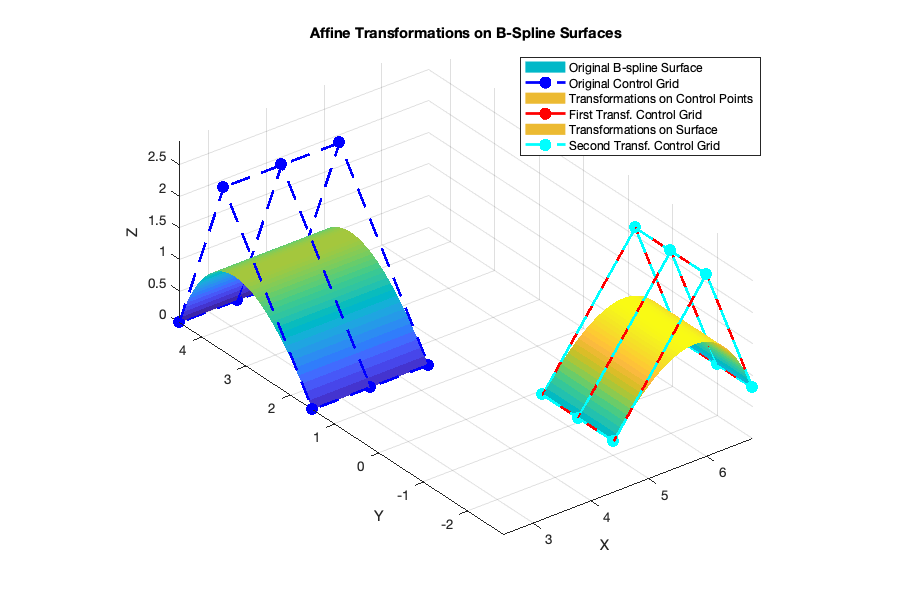

In [129]:
control_grid_x = [4.5 3.5 2.5; 4.5 3.5 2.5; 4.5 3.5 2.5];
control_grid_y = [4.5 4.5 4.5; 3.5 3.5 3.5; 1.5 1.5 1.5];
control_grid_z = [0 0 0; 2.6 2.6 2.6; 0 0 0];
order_1 = 3;
order_2 = 3;
knot_vector_1 = [0 0 0 1 1 1];
knot_vector_2 = [0 0 0 1 1 1];
num_steps = 50;

% Initialization of the two basis matrices and steps to plot the surface.
steps_1 = linspace(knot_vector_1(order_1), knot_vector_1(end-order_1+1), num_steps);
steps_2 = linspace(knot_vector_2(order_2), knot_vector_2(end-order_2+1), num_steps);
num_base1_elements = length(knot_vector_1) - order_1;
num_base2_elements = length(knot_vector_2) - order_2; 
first_base = zeros(num_steps, num_base1_elements);
second_base = zeros(num_steps, num_base2_elements);

% Calcualte the first B-Spline base.
for i = 1 : num_steps
    for j = 1 : num_base1_elements
        first_base(i, j) = bspline_basis(j-1, order_1, knot_vector_1, steps_1(i));
    end
end

% Calcualte the second B-Spline base.
for i = 1 : num_steps
    for j = 1 : num_base2_elements
        second_base(i, j) = bspline_basis(j-1, order_2, knot_vector_2, steps_1(i));
    end
end

% Set the figure window for drawing plots.
fig = figure('Name', 'Affine Transformations on B-Spline Surface',  'NumberTitle', 'off');
fig.Position(3:4) = [800 600];
movegui(fig, 'center');

% Plot the original B-Spline surface.
second_base_t = transpose(second_base);
surf_x = first_base * control_grid_x * second_base_t;
surf_y = first_base * control_grid_y * second_base_t;
surf_z = first_base * control_grid_z * second_base_t;

origin_surf_plot = surf(surf_x , surf_y , surf_z, 'FaceColor', 'r');
hold on;
grid on;
xlabel('X');
ylabel('Y');
zlabel('Z');
title('Affine Transformations on B-Spline Surfaces');

% Plot the original control grid of the B-Spline surface.
origin_pol_plot = plot3(control_grid_x, control_grid_y, control_grid_z,  'b.--', 'linewidth', 2, 'MarkerSize', 25); 
plot3(control_grid_x.', control_grid_y.', control_grid_z.', 'b--',  'linewidth', 2);

% Tranlation, rotation and scaling transformations.
translation = [4 1 1];
rotation = [cos(pi/2) -sin(pi/2) 0; sin(pi/2) cos(pi/2) 0; 0 0 1];
scaling = [0.8 0 0; 0 0.8 0; 0 0 0.8];

% Transform control points into a single matrix for applying
% transformations (num_control_points x dimensions).
control_points = [reshape(control_grid_x.', [], 1), ...
                  reshape(control_grid_y.', [], 1), ...
                  reshape(control_grid_z.', [], 1)];

% Transformation on control points.
control_points = (control_points*rotation + translation)*scaling;

% Restore control points in three matrices (control grid).
control_grid_x = reshape(control_points(:, 1), order_1, order_2).';
control_grid_y = reshape(control_points(:, 2), order_1, order_2).';
control_grid_z = reshape(control_points(:, 3), order_1, order_2).';

% Plot the transformed B-Spline surface.
surf_x_trans = first_base*control_grid_x*second_base.';
surf_y_trans = first_base*control_grid_y*second_base.';
surf_z_trans = first_base*control_grid_z*second_base.';
trasf_control_plot = surf(surf_x_trans, surf_y_trans, surf_z_trans, 'FaceColor', 'b');

% Plot the control grid of the B-Spline surface.
trasf_pol_plot = plot3(control_grid_x, control_grid_y, control_grid_z, 'r.-', 'linewidth', 2, 'MarkerSize', 25); 
plot3(control_grid_x.', control_grid_y.', control_grid_z.', 'r-', 'linewidth', 2);

% Transform surface points matrices into a single matrix for applying
% transformations (num_control_points x dimensions).
surface_points = [reshape(surf_x.', [], 1), reshape(surf_y.', [], 1), reshape(surf_z.', [], 1)];

% Transformation on surface points.
surface_points = (surface_points*rotation + translation)*scaling;

% Restore surface points in three matrices (surf).
surf_x = reshape(surface_points(:, 1), num_steps, num_steps).';
surf_y = reshape(surface_points(:, 2), num_steps, num_steps).';
surf_z = reshape(surface_points(:, 3), num_steps, num_steps).';

% Plot the transformed B-Spline surface.
trasf_surf_plot = surf(surf_x , surf_y , surf_z, 'FaceAlpha', 0.8); shading flat; s.EdgeColor = 'none';

% Plot the control grid of the B-Spline surface and legend.
trasf_surf_pol_plot = plot3(control_grid_x, control_grid_y, control_grid_z, 'c.--', 'linewidth', 2, 'MarkerSize', 25); 
plot3(control_grid_x.', control_grid_y.', control_grid_z.', 'c--', 'linewidth', 2);
axis tight;
axis equal;
legend([origin_surf_plot origin_pol_plot(1) trasf_control_plot ...
        trasf_pol_plot(1) trasf_surf_plot ...
        trasf_surf_pol_plot(1)], {'Original B-spline Surface', ...
        'Original Control Grid', 'Transformations on Control Points',...
        'First Transf. Control Grid', 'Transformations on Surface', ...
        'Second Transf. Control Grid'}, 'Location', 'best');


## Algoritmo di de Boor per superfici
L'algoritmo di de Boor può essere esteso per calcolare anche le superfici B-Spline. Più precisamente,  l'algoritmo può essere applicato diverse volte, fino a che non si ottiene il punto corrispondente sulla superficie B-Spline $p(u,v)$ dato $(u,v)$. Dato quindi:

$$p(u, v) = \sum_{i = 0}^{n} \sum_{j = 0}^{m}  N_{i,k}(u)N_{j,l}(v) \mathbf{d}_{i, j} $$

Invece di calcolare la superficie effettuando le operazioni in cascata, possiamo porre:

$$q_i(v) = \sum_{j = 0}^{m}  N_{j,l}(v) \mathbf{d}_{i, j} \qquad i=0,\dots,n$$

Come si può notare, $q_i(v)$ è un punto sulla curva B-Spline definita dai punti di controllo $d_{i,0},d_{i,1}, \dots, d_{i,m}$.
A questo punto, si può utilizzare l'algoritmo di de Boor per calcolare $q_i$ per ogni $i$.
Si ottiene quindi 
$$P(u,v) = \sum_{i = 0}^{n}  N_{i,k}(u) q_i(v)$$
Possiamo quindi utilizzare nuovamente l'algoritmo di de Boor.
Riassumendo, quello che si fa è applicare $n+1$ volte l'algoritmo di de Boor per calcolare i vari $q_i(v)$ e poi una volta per calcolare $p(u,v)$.
Lo script sottostante implementa l'algoritmo di de Boor modificato per calcolare le superfici B-Spline come spiegato sopra.

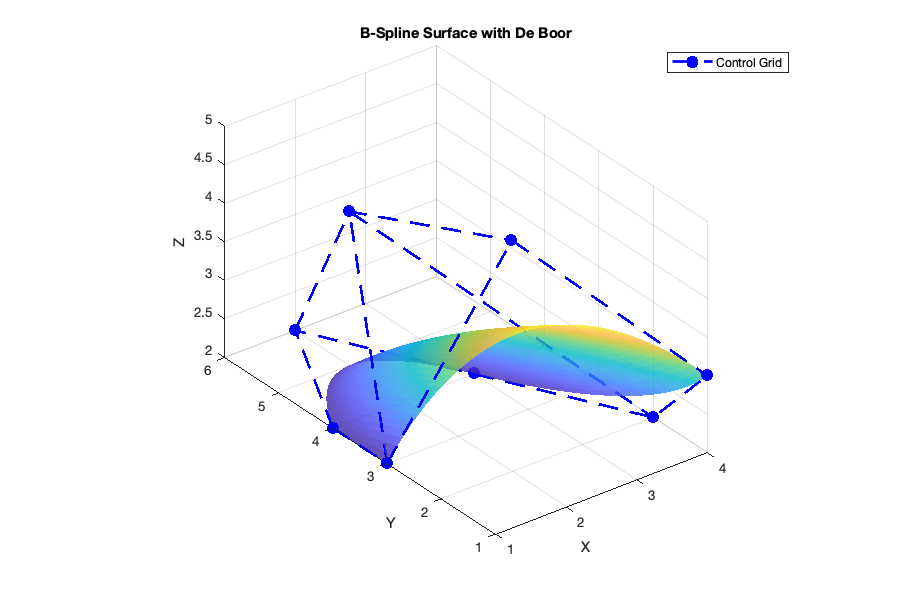

In [120]:
% Retrive inputs.
p_x = [1 2 3; 1 2 4; 1 2 4];
p_y = [4 6 4; 3 5 2; 3 2 1];
p_z = [2 2 2; 2 4 2; 2 5 3];
order_1 = 3;
order_2 = 3;
knot_vector_1 = [zeros(1, order_1), ones(1, order_1)];
knot_vector_2 = [zeros(1, order_2), ones(1, order_2)];
num_steps = 50;
  
control_points = [reshape(p_x', [], 1), reshape(p_y', [], 1), reshape(p_z', [], 1)];

% Initialization of the two basis matrices and steps to plot the surface.
steps_1 = linspace(knot_vector_1(order_1), knot_vector_1(end-order_1+1),num_steps);
steps_2 = linspace(knot_vector_2(order_2), knot_vector_2(end-order_2+1),num_steps);

% Calculate with de boor every point of the B-Spline surface.
surface_points = zeros(num_steps*num_steps, 3);
count = 1;
for i = 1 : num_steps
    for j = 1 : num_steps
        % n times de Boor algorithm to calculate n points.
        n = length(knot_vector_1) - order_1;
        m = length(knot_vector_2) - order_2;
        Q = zeros(n, 3);
        for k = 1 : n
            Q(k, :) =  bspline_deboor(order_2, knot_vector_2, control_points(m*(k-1)+1: m*k, :)', steps_2(j));
        end
        
        % de Boor algorithm on Q to calculate the final surface point.
        surface_points(count, :) = bspline_deboor(order_1, knot_vector_1, Q', steps_1(i));
        count = count + 1;
    end
end

% Set the figure window for drawing plots.
figure('Name', 'B-Spline Surface with De Boor', 'NumberTitle', 'off');

% Plot the b-spline surface.
surface_matrix_x = reshape(surface_points(:, 1), num_steps, num_steps).';
surface_matrix_y = reshape(surface_points(:, 2), num_steps, num_steps).';
surface_matrix_z = reshape(surface_points(:, 3), num_steps, num_steps).';
surf(surface_matrix_x, surface_matrix_y, surface_matrix_z, 'FaceAlpha', 0.8); shading flat; s.EdgeColor = 'none';
hold on; grid on;
xlabel('X');
ylabel('Y');
zlabel('Z');
title('B-Spline Surface with De Boor');

% Puts control points in three matrices (control grid).
control_grid_x = reshape(control_points(:, 1), order_1, order_2).';
control_grid_y = reshape(control_points(:, 2), order_1, order_2).';
control_grid_z = reshape(control_points(:, 3), order_1, order_2).';

% Plot the control grid of the B-Spline surface.
pol_plot = plot3(control_grid_x, control_grid_y, control_grid_z, 'b.--', 'linewidth', 2, 'MarkerSize', 25); 
plot3(control_grid_x.', control_grid_y.', control_grid_z.', 'b--', 'linewidth', 2);
axis tight; axis equal;
legend(pol_plot(1), {'Control Grid'}, 'Location', 'best');


Approssimazione ai minimi quadrati
==============

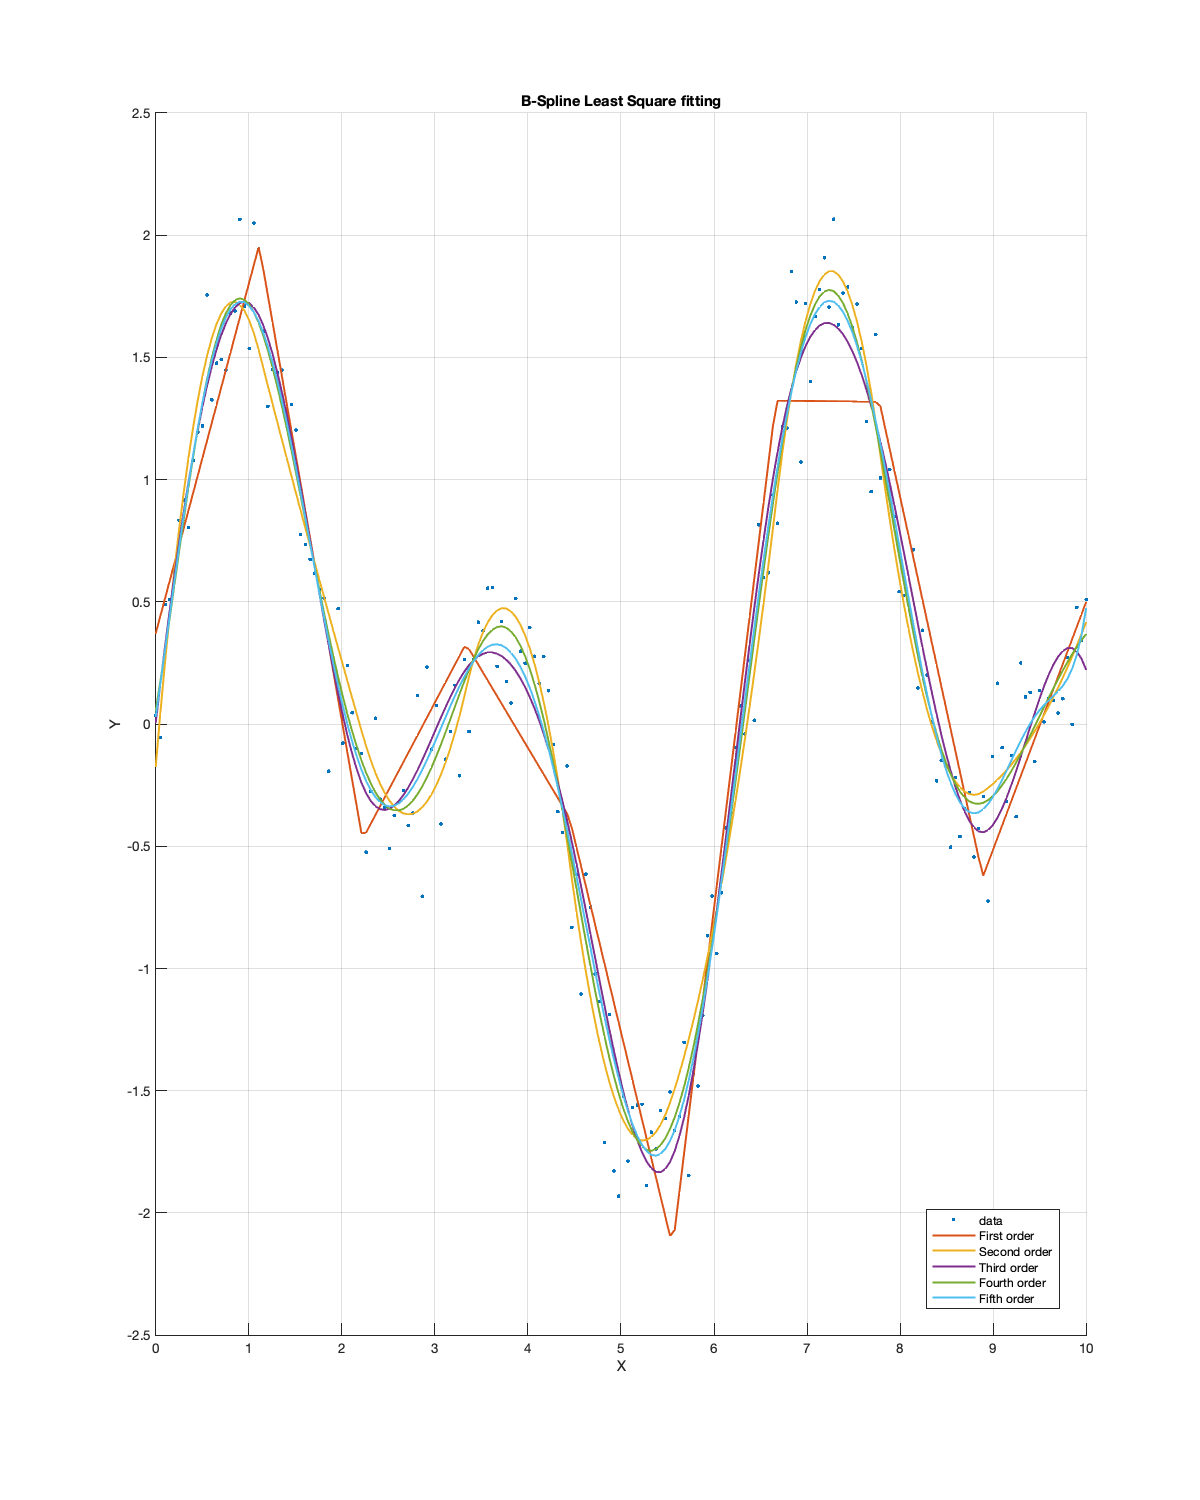

In [5]:
% setup
d = 3;
 
f = @(x) sin(x) + sin(2*x);
f_err = @(x) f(x) + 0.2 * randn(size(x));
 
xMin = 0;
xMax = 10;
nx = 200;
nknots = 10;
 
x = linspace(xMin, xMax, nx)';
y = f(x);
y_err = f_err(x);
knots = linspace(xMin, xMax, nknots);
 
lambda = 0.05;
% plot
hold on;grid on;
xlabel('X');ylabel('Y');
title('B-Spline Least Square fitting');
plot(x, y_err, '.', 'DisplayName', 'data'); 
%plot(x, y);
    
for d=1:5
    [y_fit, err] = bs_least_square(x, y_err, d, knots, lambda);
    
    ordinal = iptnum2ordinal(d);
    plot(x, y_fit, 'linewidth', 1.5, 'DisplayName', [upper(ordinal(1)), ordinal(2:min(end)) ' order']);
end

% plot(x, y - y_fit);

% stat
aver = sum(y)/nx;
rrmse = sqrt(sum((y - y_fit).^2)/nx) / aver * 100;

legend('Location', 'best');

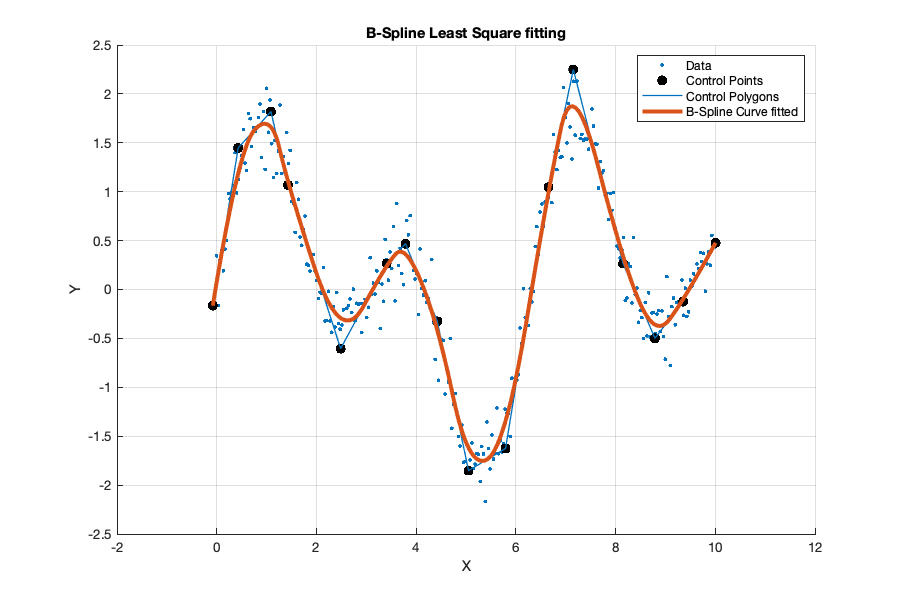

In [42]:
% setup
d = 3;
 
f = @(x) sin(x) + sin(2*x);
f_err = @(x) f(x) + 0.2 * randn(size(x));
 
xMin = 0;
xMax = 10;
nx = 300;
nknots = 15;
 
x = linspace(xMin, xMax, nx)';
y = f(x);
y_err = f_err(x);
knots = build_knot_vector(d,nknots);

 
lambda = 0.05;
% plot
hold on;grid on;
xlabel('X');ylabel('Y');
title('B-Spline Least Square fitting');
plot(x, y_err, '.', 'DisplayName', 'data'); 
%plot(x, y);
    

knots = build_knot_vector(d,nknots);
[y_fit, C] = bs_least_square_1(x, y_err, d, knots);

plot(C(:, 1), C(:, 2), 'k.', 'MarkerSize', 20);
plot(C(:, 1), C(:, 2), '-', 'linewidth', 1, 'color', '#0072BD');

curve = bspline_deboor(d, knots, C');
plot(curve(1, :), curve(2, :), 'linewidth', 3, 'color', '#D95319');

ordinal = iptnum2ordinal(d);
%plot(x, y_fit, 'linewidth', 1.5, 'DisplayName', [upper(ordinal(1)), ordinal(2:min(end)) ' order']);


legend( 'Data','Control Points', ...
        'Control Polygons', 'B-Spline Curve fitted');

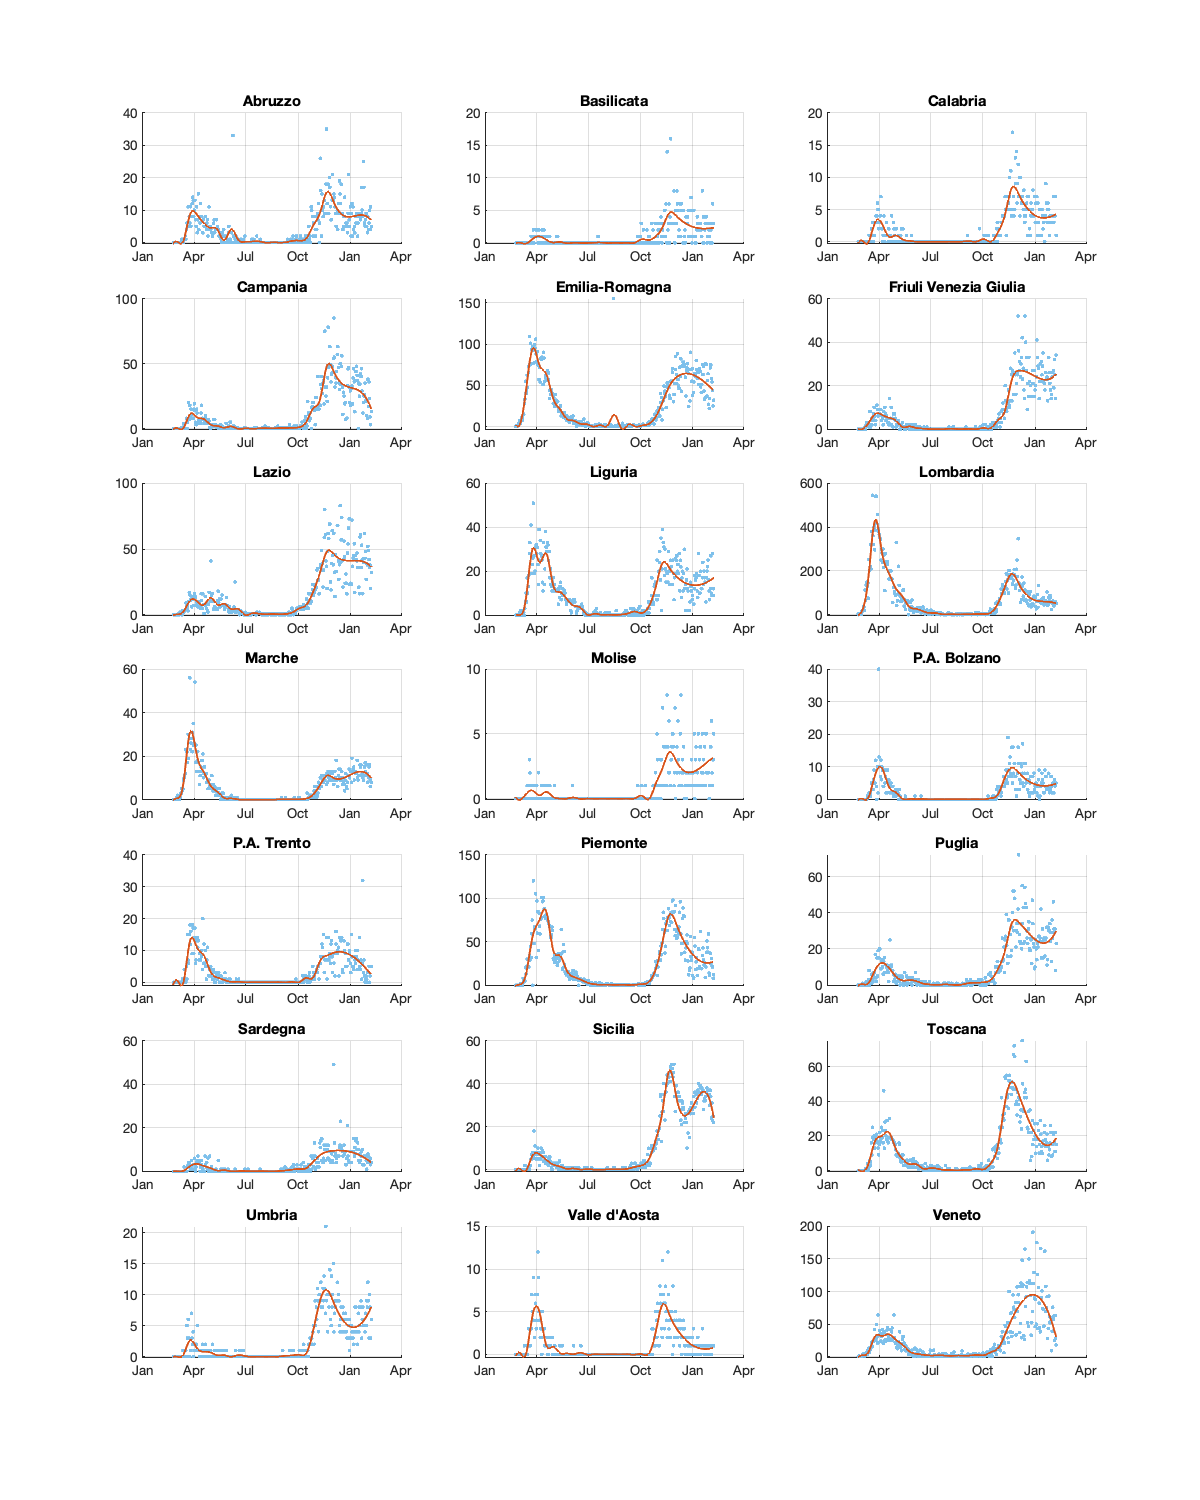

In [4]:
%plot inline -w 1200 -h 1500
T = readtable('datasets/dataCOVID_all.csv');
[G, id] = findgroups(T.region);

tiledlayout(7,3)

% setup
d=3;
nknots = 30;

offset = 55; % just for plotting purpose, start date is 25 feb = (1 Jan) + 55 days

for i = 1:length(id)
    g = T(string(T.region)==id{i}, :);
    
    x = (offset:1:size(g,1)+offset-1)';
    y = g.deaths;
    y(y<0) = 0;
    
    knots = linspace(0, size(g,1), nknots);
    [y_fit, ~] = bs_least_square(x, y, d, knots, .05);
    
    ax=nexttile;
    title(ax,id{i})
    hold on;grid on;
    plot(x, y, '.', 'DisplayName', 'data', 'color', '#7DC0EB'); 
    plot(x, y_fit, 'linewidth', 1.5);
    datetick('x','mmm')
end

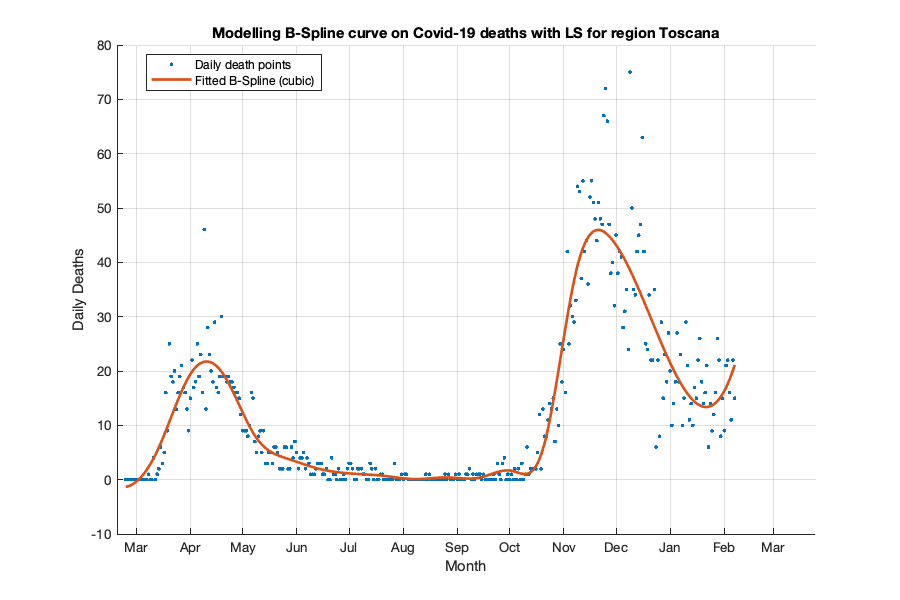

In [6]:
%plot inline -w 900 -h 600
% setup
d=3;
nknots = 20;
lambda=.5; % smoothing parameter

offset = 55; % just for plotting purpose, start date is 25 feb = (1 Jan) + 55 days

g = T(string(T.region)=='Toscana', :);

x = (offset:1:size(g,1)+offset-1)';
y = g.deaths;
y(y<0) = 0;

knots = linspace(0, size(g,1), nknots);
[y_fit, ~] = bs_least_square(x, y, d, knots, lambda);

title('Modelling B-Spline curve on Covid-19 deaths with LS for region Toscana')
hold on;grid on;
plot(x, y, '.');
plot(x, y_fit, 'linewidth', 2);
datetick('x','mmm', 'keeplimits')
xlabel('Month');
ylabel('Daily Deaths');
legend({'Daily death points', 'Fitted B-Spline (cubic)'}, 'Location', 'best');



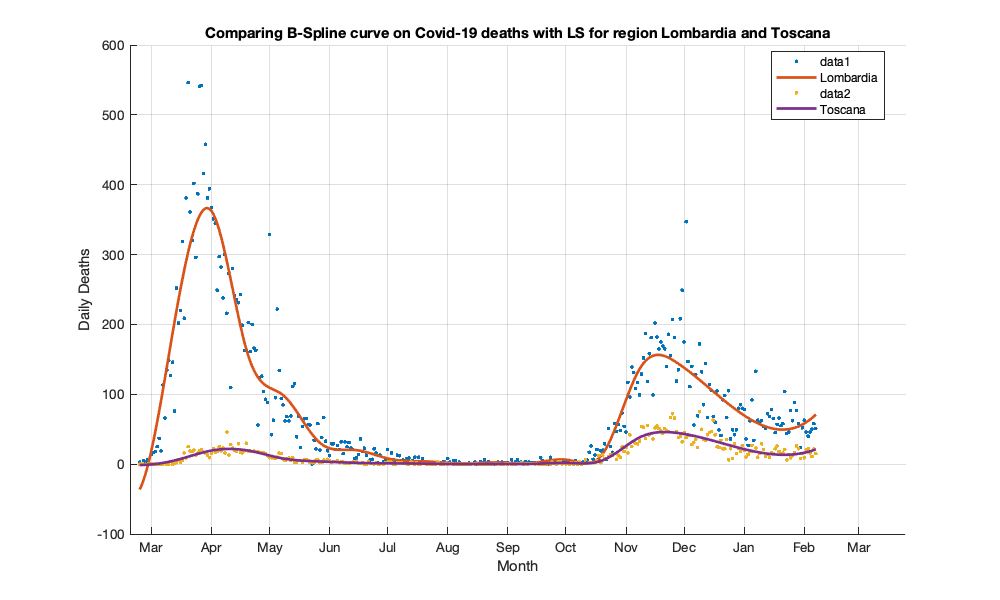

In [7]:
%plot inline -w 1000 -h 600
% setup
d=3;
nknots = 20;
lambda=.5; % smoothing parameter

offset = 55; % just for plotting purpose, start date is 25 feb = (1 Jan) + 55 days

for i = 1:length(id)
    if strcmp(id{i},'Lombardia')' || strcmp(id{i},'Toscana')
        g = T(string(T.region)==id{i}, :);

        x = (offset:1:size(g,1)+offset-1)';
        y = g.deaths;
        y(y<0) = 0;

        knots = linspace(0, size(g,1), nknots);
        [y_fit, ~] = bs_least_square(x, y, d, knots, lambda);

        title('Comparing B-Spline curve on Covid-19 deaths with LS for region Lombardia and Toscana')
        hold on;grid on;
        plot(x, y, '.');
        plot(x, y_fit, 'linewidth', 2, 'DisplayName', id{i});
        datetick('x','mmm', 'keeplimits')
        xlabel('Month');
        ylabel('Daily Deaths');
    end
end
legend('Location', 'best');


rrmse =

    1.4542



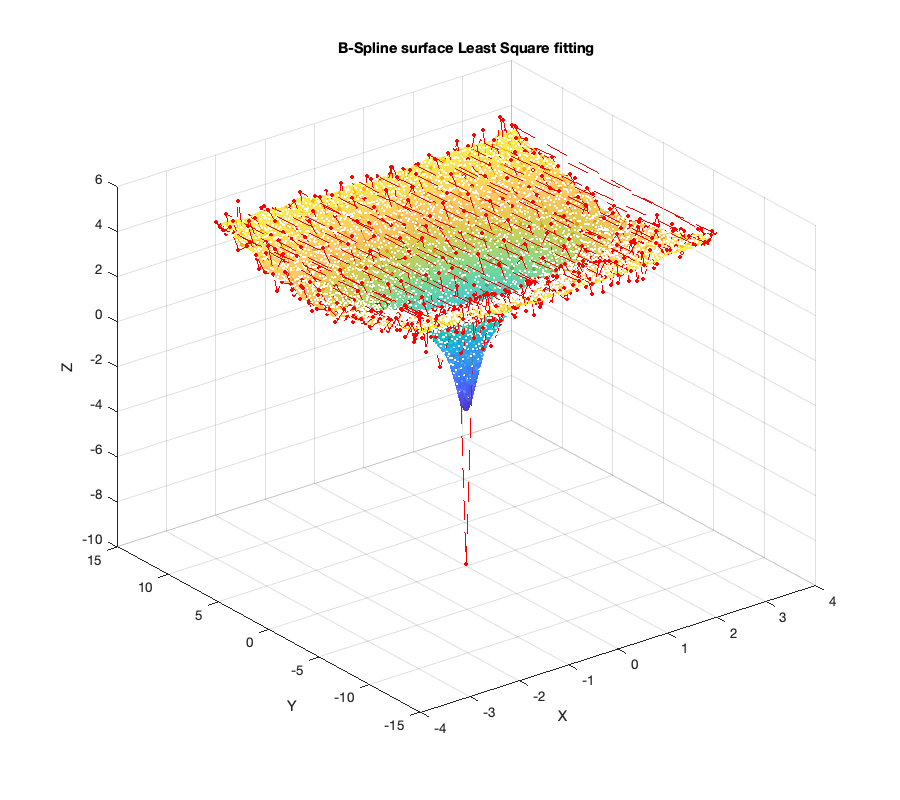

In [23]:
%plot inline -w 900 -h 800
%% setup
degree = 4;

errAbs = .5;
err = @(s, a, b) a + (b-a).*rand(s);
%f = @(x, y) cos(10*(x.^2+y)).*sin(10*(x+y.^2));
f = @(x, y) log(4*x.^2+y.^2);
f_err = @(x, y) f(x, y) + err(size(x), -errAbs/2, errAbs/2);

xMin = -3;
xMax = 3;
yMin = -10;
yMax = 10;
nx = 100;
ny = 100;
nknots_x = 24;
nknots_y = 24;

x = linspace(xMin, xMax, nx)';
y = linspace(yMin, yMax, ny)';

[x, y] = meshgrid(x, y);
x = reshape(x, [numel(x) 1]);
y = reshape(y, [numel(y) 1]);

z = f(x, y);
z_err = f_err(x, y);
knots_x = linspace(xMin, xMax, nknots_x);
knots_y = linspace(yMin, yMax, nknots_y);

%% fit
[z_fit, C] = bs_least_square_2(x, y, z_err, degree, knots_x, knots_y);

%% plot
x = reshape(x, [nx, ny]);
y = reshape(y, [nx, ny]);
z = reshape(z, [nx, ny]);
z_err = reshape(z_err, [nx, ny]);
z_fit = reshape(z_fit, [nx, ny]);

figure;
plot3(x,y,z_err,'w.', 'MarkerSize', .1);
title('B-Spline surface Least Square fitting');
xlabel('X');ylabel('Y');zlabel('Z');
hold on;grid on;
surf(x,y,z_fit,'FaceAlpha', 0.8); shading flat; s.EdgeColor = 'none';

% Plot the control grid of the B-Spline surface.
plot3(C(:,1), C(:,2), C(:,3), 'r.--', 'MarkerSize', 10); 

%% stat
aver = sum(sum(z))/nx/ny;
rrmse = sqrt(sum(sum((z - z_fit).^2)) / nx / ny) / aver * 100


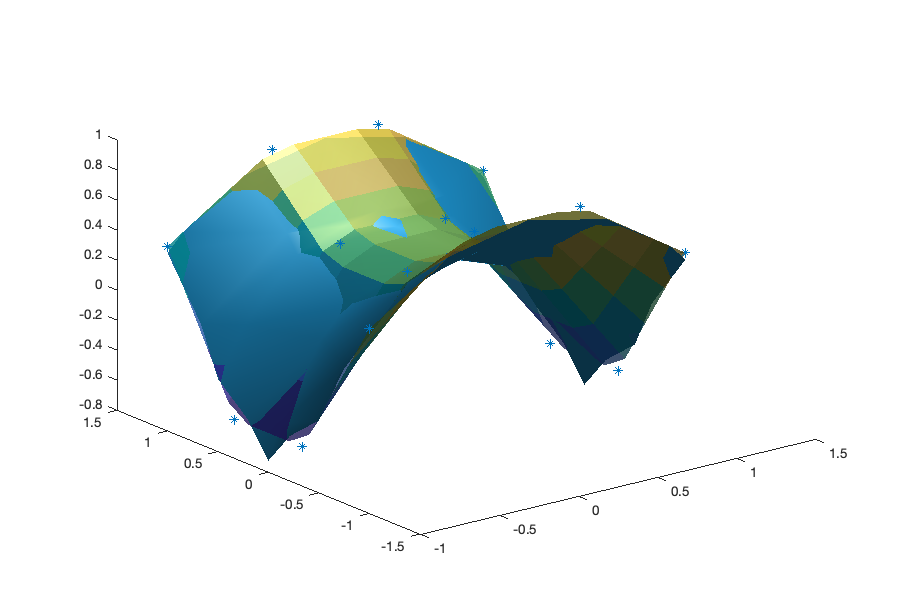

In [203]:
%Grid
h = .5;
[X,Y,Z]=meshgrid(-1:h:1,-1:h:1,-1:h:1);

%Volume Data
V=@(X,Y,Z)exp(Z)-Y.^2+X.^2-1.5;

%Marching Cubes
fv=isosurface(X,Y,Z,V(X,Y,Z),0);

isosurface(X,Y,Z,V(X,Y,Z),0)

%point data
P=fv.vertices;
Px=P(:,1);
Py=P(:,2);
Pz=P(:,3);

%connectivity information
TRI=fv.faces;

%corresponding parametrization
U=(Px-min(Px))/(max(Px)-min(Px));
V=(Py-min(Px))/(max(Py)-min(Px));

%number of control points in u
N = 4;
%number of control points in v
M = 4;

%polynomial degree
p = 2;

%knot vector u
knot_vector_u = zeros(N+2*p-2, 1);
for i=p:N+p-1
    knot_vector_u(i) = (i-p)/(N-1);
end
for i=N+p-1:N+2*p-2
    knot_vector_u(i) = 1;
end

%knot vector v
knot_vector_v = zeros(M+2*p-2, 1);
for i=p:M+p-1
    knot_vector_v(i) = (i-p)/(M-1);
end
for i=M+p-1:M+2*p-2
    knot_vector_v(i) = 1;
end

% put point data into vector
XData = [Px;Py;Pz];

% construct least squares matrix
N_data=numel(U);
N_control_points_u=numel(knot_vector_u)-p;
N_control_points_v=numel(knot_vector_v)-p;
N_control_points_total=N_control_points_u*N_control_points_v;

A=zeros(N_data,N_control_points_total);
for i_u = 1 : N_control_points_u
    for i_v = 1: N_control_points_v
        for j = 1: N_data
            i = (i_v-1)*N_control_points_u+i_u;
            A(j,i) = bspline_basis(i_u-1,p,knot_vector_u, U(j))*bspline_basis(i_v-1,p,knot_vector_v, V(j));
        end
    end
end

%put three blocks A on the diagonal of a matrix.
A=kron(eye(3),A);

% least squares with mldivide
C=A\XData;

% compute points of fit
X=A*C;

% residual
res = sum(sum((X-XData).^2));

Cx = C(1:end/3);
Cy = C(end/3+1:end*2/3);
Cz = C(end*2/3+1:end);

[U,V]=meshgrid(0:.1:1);

X=zeros(size(U));
Y=zeros(size(U));
Z=zeros(size(U));

for i = 1:numel(U)
    for j_u = 1 : N_control_points_u
        for j_v = 1: N_control_points_v            
            j = (j_v-1)*N_control_points_u+j_u;
            X(i)=Cx(j)*bspline_basis(j_u-1,p,knot_vector_u, U(i))*bspline_basis(j_v-1,p,knot_vector_v, V(i))+X(i);
            Y(i)=Cy(j)*bspline_basis(j_u-1,p,knot_vector_u, U(i))*bspline_basis(j_v-1,p,knot_vector_v, V(i))+Y(i);
            Z(i)=Cz(j)*bspline_basis(j_u-1,p,knot_vector_u, U(i))*bspline_basis(j_v-1,p,knot_vector_v, V(i))+Z(i);
        end
    end
end

hold on
surf(X,Y,Z,'FaceAlpha', 0.8); shading flat; s.EdgeColor = 'none';
plot3(Cx,Cy,Cz,'*')
hold off